In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download phiard/aksara-jawa

 65% 17.0M/26.0M [00:01<00:00, 17.8MB/s]
100% 26.0M/26.0M [00:01<00:00, 25.2MB/s]


In [ ]:
! unzip /content/aksara-jawa.zip

Archive:  /content/aksara-jawa.zip
  inflating: prediction/prediction/ba17.png  
  inflating: prediction/prediction/ba49.mine2.png  
  inflating: prediction/prediction/ca2.png  
  inflating: prediction/prediction/da5.png  
  inflating: prediction/prediction/dha11.png  
  inflating: prediction/prediction/ga16.png  
  inflating: prediction/prediction/ha0.png  
  inflating: prediction/prediction/ja12.png  
  inflating: prediction/prediction/ka4.png  
  inflating: prediction/prediction/la9.png  
  inflating: prediction/prediction/ma.0.jpg  
  inflating: prediction/prediction/ma.1.jpg  
  inflating: prediction/prediction/ma15.png  
  inflating: prediction/prediction/na1.png  
  inflating: prediction/prediction/nga19.png  
  inflating: prediction/prediction/nga220.pred.png  
  inflating: prediction/prediction/nya14.png  
  inflating: prediction/prediction/pa10.png  
  inflating: prediction/prediction/ra164.pred.png  
  inflating: prediction/prediction/ra3.png  
  inflating: prediction/predic

In [ ]:
# Import package that we need
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [ ]:
# Do the image augmentation and rescale image
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range = 0.2, height_shift_range = 0.2,
                                   shear_range = 0.2, zoom_range = 0.2, fill_mode='nearest')

train_data = train_datagen.flow_from_directory(
    directory='/content/v3/v3/train',
    target_size=(112,112),
    color_mode="grayscale",
    batch_size=30)

validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_data = validation_datagen.flow_from_directory(
    directory='/content/v3/v3/val',
    target_size=(112,112),
    color_mode="grayscale",
    batch_size=30)

Found 2154 images belonging to 20 classes.
Found 480 images belonging to 20 classes.


In [ ]:
# Define the model
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras
def create_model():
  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(256, (5,5), activation = 'relu', padding = 'same', input_shape=(112,112,1)),
      tf.keras.layers.LeakyReLU(alpha=0.2),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(256, (5,5)),
      tf.keras.layers.LeakyReLU(alpha=0.3),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (5,5)),
      tf.keras.layers.LeakyReLU(alpha=0.3),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.GlobalMaxPool2D(),
      tf.keras.layers.Dense(1024),
      tf.keras.layers.LeakyReLU(alpha=0.2),
      tf.keras.layers.Dense(20, activation = 'softmax')
  ])


  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy'])
  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 112, 112, 256)     6656      
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 112, 112, 256)     0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 56, 56, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 256)       1638656   
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 52, 52, 256)       0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 256)      0         
 g2D)                                                 

In [ ]:
history = model.fit_generator(generator = train_data, validation_data = validation_data, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


72/72 [==============================] - 12s 124ms/step - loss: 2.9970 - accuracy: 0.0460 - val_loss: 2.9375 - val_accuracy: 0.1021
Epoch 2/100
72/72 [==============================] - 7s 101ms/step - loss: 2.0760 - accuracy: 0.3366 - val_loss: 1.4134 - val_accuracy: 0.5146
Epoch 3/100
72/72 [==============================] - 7s 102ms/step - loss: 0.7163 - accuracy: 0.7354 - val_loss: 0.5266 - val_accuracy: 0.7771
Epoch 4/100
72/72 [==============================] - 7s 102ms/step - loss: 0.3735 - accuracy: 0.8542 - val_loss: 0.4818 - val_accuracy: 0.8438
Epoch 5/100
72/72 [==============================] - 7s 101ms/step - loss: 0.2874 - accuracy: 0.8965 - val_loss: 0.4574 - val_accuracy: 0.8625
Epoch 6/100
72/72 [==============================] - 7s 100ms/step - loss: 0.2186 - accuracy: 0.9160 - val_loss: 0.7215 - val_accuracy: 0.8125
Epoch 7/100
72/72 [==============================] - 7s 100ms/step - loss: 0.1994 - accuracy: 0.9280 - val_loss: 0.4934 - val_accuracy: 0.8542
Epoch 8/10

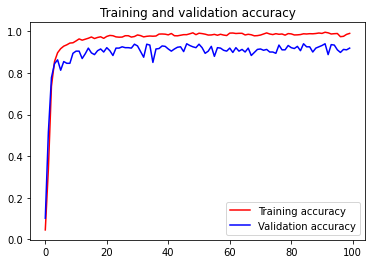

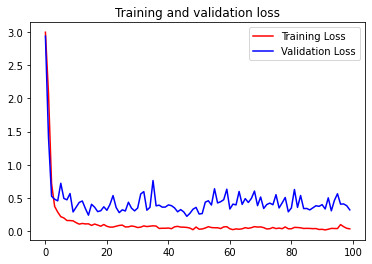

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('Aksara_Java_Classification.h5',save_format=".h5")



In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open('Aksara_Jawa.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp6imfco42/assets


INFO:tensorflow:Assets written to: /tmp/tmp6imfco42/assets


10473480

In [ ]:
import numpy as np

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
ga


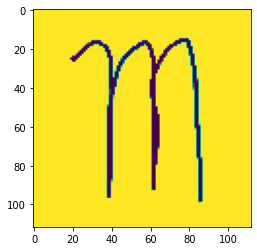

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/prediction/prediction/ga16.png",
                     target_size=(112,112), 
                     color_mode='grayscale')
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=2)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/Aksara_Java_Classification.h5")
output = saved_model.predict(img)

max = output[0][0]
pos = 0
for i in range(1, 19): 
    if output[0][i] > max: 
        max = output[0][i]
        pos = i
         
print(output)
print(max)

if (pos == 0) :
    print("ba")
elif (pos == 1) :
    print('ca')
elif (pos == 2) :
    print('da')
elif (pos == 3) :
    print('dha')
elif (pos == 4) :
    print('ga')
elif (pos == 5) :
    print('ha')
elif (pos == 6) :
    print('ja')
elif (pos == 7) :
    print('ka')
elif (pos == 8) :
    print('la')
elif (pos == 9) :
    print('ma')
elif (pos == 10) :
    print('na')
elif (pos == 11) :
    print('nga')
elif (pos == 12) :
    print('nya')
elif (pos == 13) :
    print('pa')
elif (pos == 14) :
    print('ra')
elif (pos == 15) :
    print('sa')
elif (pos == 16) :
    print('ta')
elif (pos == 17) :
    print('tha')
elif (pos == 18) :
    print('wa')
elif (pos == 19) :
    print('ya')
